## HW3 Q.5
The _half-normal_ distribution has the following pdf:
    $f(x) = \begin{cases}
           \sqrt{\frac{2}{\pi}}\cdot e^{-x^2/2} &\text{ $x \geq 0$}\\
            0 &\text{otherwise}\end{cases} \\ $
 This is the distribution of $\mid Z \mid$, where $Z \sim N(0, 1)$; equivalently, it’s the pdf that arises by
 “folding” the standard normal distribution in half along its line of symmetry. Consider
 simulating values from this distribution using the accept–reject method with a candidate
 distribution $g(x)=e^x$ for $x \geq 0$ (i.e., an exponential pdf with $\lambda = 1$).

(a) Find the inverse cdf corresponding to g(x). (This will allow us to simulate values from the
candidate distribution.)

(b) Find the smallest majorization constant $c$ so that $f(x)/g(x) \leq c$ for all $x \geq 0$. [Hint: Use
calculus to determine where the ratio $\frac{f(x)}{g(x)}$ is maximized.]

(c) On the average, how many candidate values will be required to generate 10,000
“accepted” values?

(d) Write a program to construct 10,000 values from a half-normal distribution.

---
<span style="font-size: 1.1em;"> (a)$\\
\begin{align}\\
&g(x) = e^{-x}  \text{  for } x \geq 0 \\
\\
&G(x) = \int_{x=0}^\infty e^{-x}\,dx = -\int_{u=0}^\infty e^{u}\,du = -e^{-x} + 1\\
\\
&G^{-1}(x) = -ln(x - 1)
\end{align}$


---
<span style="font-size: 1.1em;">(b)$\\
\begin{align}
&\frac{f(x)}{g(x)} = \frac{\sqrt{\frac{2}{\pi}}\cdot e^{-x^2/2}}{e^{-x}} = \sqrt{\frac{2}{\pi}}\cdot e^{\frac{-x^2}{2} + x}\\
\\
&\sqrt{\frac{2}{\pi}}\cdot\frac{d}{dx}e^{\frac{-x^2}{2} + x} = \sqrt{\frac{2}{\pi}}\cdot[(-x+1)\cdot e^{\frac{-x^2}{2} + x}] = 0 \\
\\
&\Rightarrow x = 1\\
\\
&c = \frac{f(1)}{g(1)} = \frac{2}{\pi}\cdot e^{0.5} \approx 1.315
\end{align}$

---
(c) and (d) 

Average:  0.7617306520414382


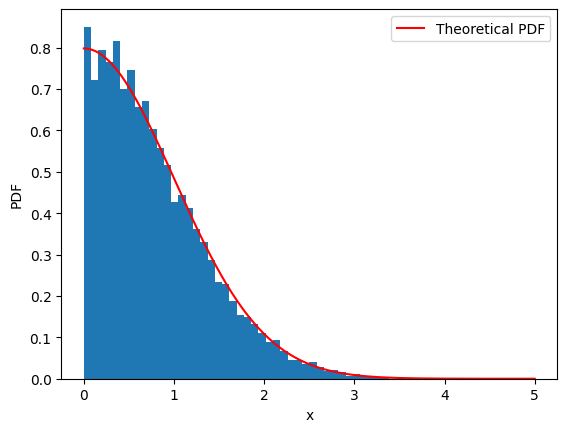

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def half_normal(n):
    # majorization constant
    c = np.sqrt(2/np.pi)*np.exp(1/2)

    # initialization
    count = 0
    accepted = []

    # loop until we have n accepted values
    while(len(accepted)<n):
        # generate a candidate value
        x = -np.log(1-np.random.rand())
        count+=1
        # generate a uniform rv
        u = np.random.rand()

        # compute the ratio
        ratio  = np.sqrt(2/np.pi) * np.exp(-x**2/2)/(c* np.exp(-x))

        # accept/reject the value
        if u <= ratio:
            accepted.append(abs(x))

    # return the accepted values and the average number of candidate values per accepted value
    return accepted, n/count

 # run the function   
samples, avg = half_normal(10000)
print("Average: ", avg)

# plot a histogram of the samples
plt.hist(samples, bins=50, density=True)

# plot the theoretical pdf
x = np.linspace(0, 5, 1000)
pdf = np.sqrt(2/np.pi) * np.exp(-x**2/2)
plt.plot(x, pdf, 'r-', label='Theoretical PDF')

# set the axis labels and legend
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

# show the plot
plt.show()